In [1]:
import os
import pandas as pd
import torch

### Differentiable Tensor (Enabling requires_grad)

In [2]:
X = torch.randn(5, 5)
Y = torch.randn(5, 5)
Z = torch.randn((5, 5), requires_grad=True)

A = X + Y
print(f"Does A require gradients? {A.requires_grad}")
B = X + Z
print(f"Does B require gradients? {B.requires_grad}")

Does A require gradients? False
Does B require gradients? True


In [3]:
# Create a 2x2 matrix
W = torch.tensor([[1,2], [3, 4]], requires_grad=True, dtype=torch.float)
W

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [4]:
# Do an operation
Y = W - 2
Y

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)

In [5]:
Y.grad_fn

In [6]:
Y = Y * Y + 3
a = Y.mean()
a

tensor(4.5000, grad_fn=<MeanBackward0>)

In [7]:
from torchviz import make_dot

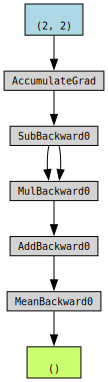

In [8]:
make_dot(a)

### Gradients

In [9]:
a.backward()

Print $\frac{\delta a}{\delta W}$

In [10]:
W.grad

tensor([[-0.5000,  0.0000],
        [ 0.5000,  1.0000]])

### Backprop

In [11]:
W = W - 0.0001 * W.grad
W

tensor([[1.0000, 2.0000],
        [2.9999, 3.9999]], grad_fn=<SubBackward0>)

In [12]:
n = 3
x = torch.arange(1., n+1)
w = torch.ones(n, requires_grad=True)

In [13]:
y = w @ x
y

tensor(6., grad_fn=<DotBackward0>)

In [14]:
y.backward()

In [15]:
w.grad

tensor([1., 2., 3.])

In [16]:
x.grad

### Least-Squares

#### Load and pre-process data

In [17]:
# Load data
DATADIR = "/Users/mghifary/Work/Code/AI/data"
datapath = os.path.join(DATADIR, "house_sales.csv")

# Read data frame
df = pd.read_csv(datapath)

# Take only price, area, and beds
x_area = torch.from_numpy(df["area"].values).float()
x_beds = torch.from_numpy(df["beds"].values).float()


y = torch.from_numpy(df["price"].values).float()

#### Model / forward computation

In [18]:
def linear_model_1d(x, w):
    n = x_area.shape[0]
    X = torch.vstack([torch.ones(n), x]).T
    return X @ w

#### Compute least squares - 1D

In [19]:
import matplotlib.pyplot as plt
def plot_ls(x, y, y_hat):
    plt.ion()
    plt.xlabel("area")
    plt.ylabel("price")

    # Plot area vs price
    plt.plot(x, y, 'o', color='blue')
    plt.plot(x_area, y_hat, '-', color='red')

In [20]:
# define model paramter
w = torch.randn(2, dtype=torch.float, requires_grad=True)
print(f"model weights: {w.shape}, {w}")

model weights: torch.Size([2]), tensor([0.2657, 1.2870], requires_grad=True)


loss: 49435712.0


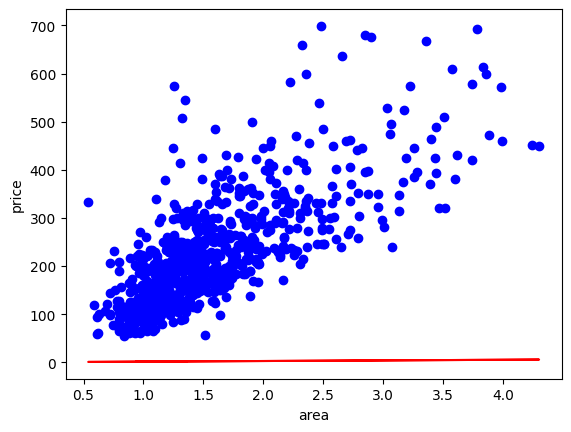

In [21]:
# forward pass
y_hat = linear_model_1d(x_area, w)

# loss function
loss = torch.sum((y - y_hat) ** 2)
print(f"loss: {loss}")

plot_ls(x_area, y, y_hat.detach().numpy())

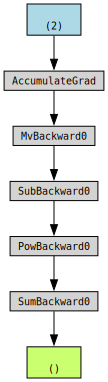

In [22]:
make_dot(loss)

loss: 7864121.5


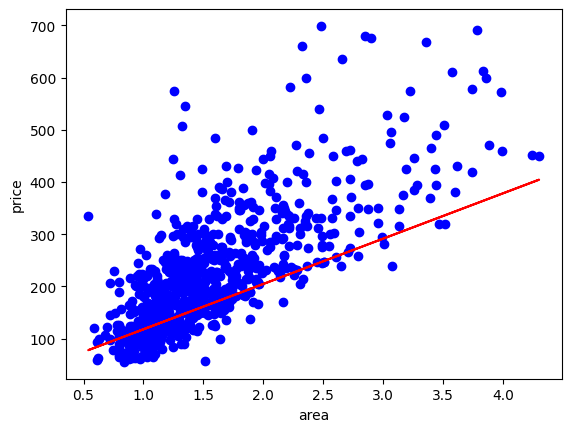

In [43]:
# zero grad
# w.grad.zero_()

# forward pass
y_hat = linear_model_1d(x_area, w)

# loss function
loss = torch.sum((y - y_hat) ** 2)

# backward pass
loss.backward()

# update weights

lrate = 1e-5
with torch.no_grad():
    w.copy_(w - lrate * w.grad)

print(f"loss: {loss.item()}")

plot_ls(x_area, y, y_hat.detach().numpy())
